# Import

In [2]:
# Basic import
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
# Augmentation
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Read excel


In [8]:
df = pd.read_excel('/kaggle/input/Data-MoreThanTwoMasks/Data-MoreThanTwoMasks.xlsx')

In [ ]:
df_cancer = df[df['Status'] == 'Cancer']
df_cancer.loc[:, 'fullPath']  = df_cancer['fullPath'].str.replace('\\', '/',regex=False)

df_normal = df[df['Status'] == 'Normal']
df_normal.loc[:, 'fullPath']  = df_normal['fullPath'].str.replace('\\', '/', regex=False)

In [ ]:
# Cancer class
base = '/kaggle/input/MINI-DDSM-Complete-PNG-16'
c = 0
for fn in df_cancer['fullPath'].to_list():
    fn_path = os.path.join(base,fn)
    print(fn_path)
    c +=1
    if c == 6: break
    img = mpimg.imread(fn_path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

In [ ]:
# Normal class
base = '/kaggle/input/miniddsm2/MINI-DDSM-Complete-PNG-16'
c = 0
for fn in df_normal['fullPath'].to_list():
    fn_path = os.path.join(base,fn)
    print(fn_path)
    c +=1
    if c == 6: break
    img = mpimg.imread(fn_path)
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

# Preview 

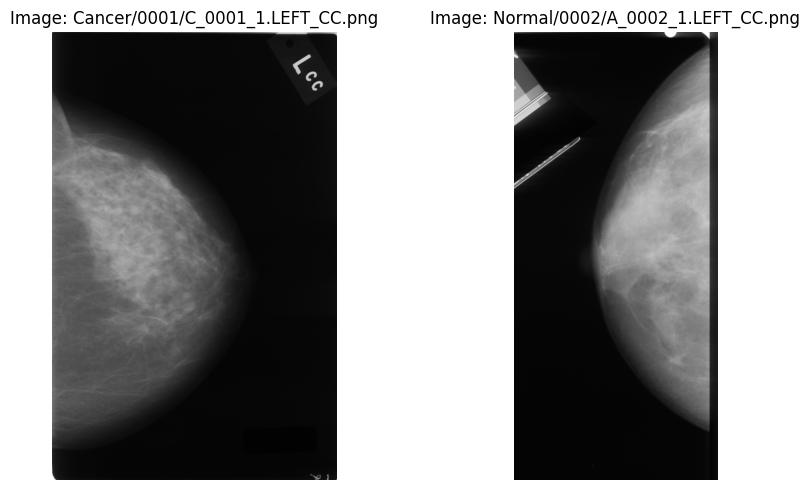

In [82]:
import os
import cv2
import matplotlib.pyplot as plt

base = '/kaggle/input/MINI-DDSM-Complete-PNG-16'
image_paths = [
    'Cancer/0001/C_0001_1.LEFT_CC.png',
    'Normal/0002/A_0002_1.LEFT_CC.png'
]

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(10, 5))

for index, image_path in enumerate(image_paths):
    img_path = os.path.join(base, image_path)  # Construct the full image path
    img = cv2.imread(img_path)  # Load the image using OpenCV
    
    # Convert the image from BGR to RGB for correct color representation
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create a subplot for each image
    plt.subplot(1, 2, index + 1)
    plt.imshow(img_rgb)
    plt.title(f"Image: {image_path}")
    plt.axis('off')  # Hide the axis

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Number of files in each class

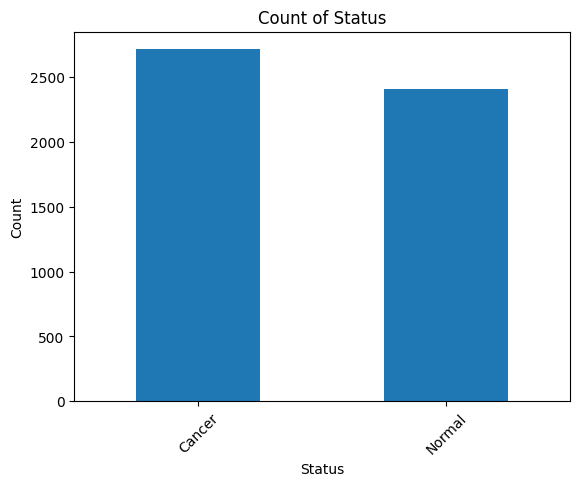

In [26]:
df_all = pd.concat([df_cancer,df_normal])
df_groupby = df_all.groupby('Status').size().to_frame('count')


# Plotting the data
df_groupby.plot(kind='bar', legend=False)
plt.title('Count of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Pixel intensity analysis

In [47]:
base = '/kaggle/input/MINI-DDSM-Complete-PNG-16'
list_cancer_file = df_cancer['fullPath'].to_list()
cancer_img_info = []

for i in list_cancer_file:
    img_path = os.path.join(base,i)
    img = Image.open(img_path)
    cancer_img_info.append(img.size)

In [62]:
base = '/kaggle/input/MINI-DDSM-Complete-PNG-16'
list_normal_file = df_normal['fullPath'].to_list()
normal_img_info = []

for i in list_normal_file:
    img_path = os.path.join(base,i)
    img = Image.open(img_path)
    normal_img_info.append(img.size)

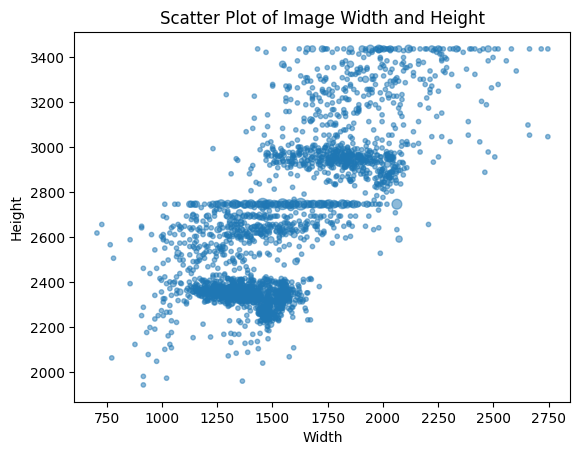

In [58]:
df_cancer_info = pd.DataFrame(cancer_img_info,columns=['width','height'])
df_groupby = df_cancer_info.groupby(['width', 'height']).size().reset_index(name='count')

# Plotting the scatter plot
plt.scatter(df_groupby['width'], df_groupby['height'], s=df_groupby['count']*10, alpha=0.5)
plt.title('Scatter Plot of Image Width and Height')
plt.xlabel('Width')
plt.ylabel('Height')

# Show plot
plt.show()

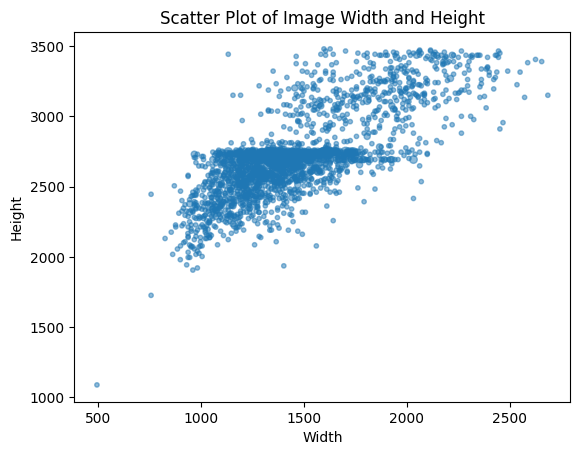

In [64]:
df_normal_info = pd.DataFrame(normal_img_info,columns=['width','height'])
df_groupby = df_normal_info.groupby(['width', 'height']).size().reset_index(name='count')

# Plotting the scatter plot
plt.scatter(df_groupby['width'], df_groupby['height'], s=df_groupby['count']*10, alpha=0.5)
plt.title('Scatter Plot of Image Width and Height')
plt.xlabel('Width')
plt.ylabel('Height')

# Show plot
plt.show()

Result: in this part since we want reduce the complexity of the model so resizing on the original dataset is a must. From here we focus on the minimum size of the image. 

# Draft

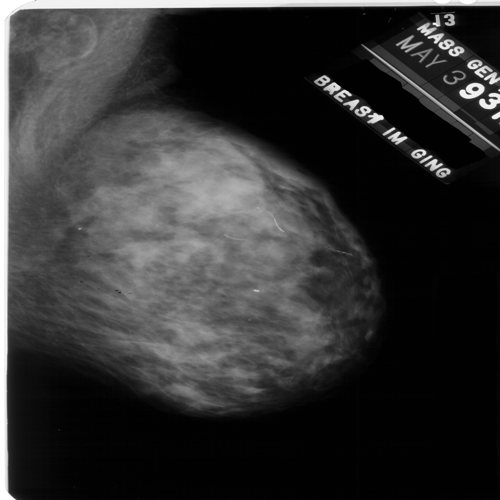

In [89]:
# Cancer/0152/C_0152_1.LEFT_MLO.png
from PIL import Image
img = Image.open('/kaggle/input/MINI-DDSM-Complete-PNG-16/Normal/1956/A_1956_1.RIGHT_MLO.png')
img.resize((500,500))

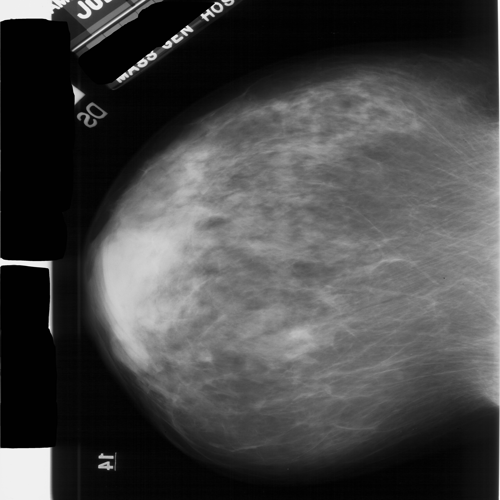

In [87]:
# Cancer/3395/B_3395_1.RIGHT_CC.png
from PIL import Image
img = Image.open('/kaggle/input/MINI-DDSM-Complete-PNG-16/Normal/2033/A_2033_1.LEFT_CC.png')
img.resize((500,500))